<a href="https://colab.research.google.com/github/MasahitoKatsuki/RabbitChallenge/blob/main/baro_tslearn_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("/content/5000barotslearn.csv",header=None)
df.head(10) #データの読み込み

,0,1,2,3,4,5,6
0,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
1,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
2,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
3,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
4,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
5,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
6,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
7,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
8,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6
9,1000.4,1000.8,1000.8,1001.1,1000.6,1000.6,1000.6


In [24]:
!pip install tslearn
#tslearn入れる

import glob
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [28]:
df.shape#サイズ確認


(4987, 7)

In [43]:
df=df.T#行列入れ替え

In [63]:

def load_tsdata():#dataloaderを定義

    plt.figure()
    df.plot()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.savefig('barograph.png')
    plt.clf()
#グラフとして出力
    return df

def main():
    df = load_tsdata()
 
if __name__ == '__main__':
    main()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  import sys


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

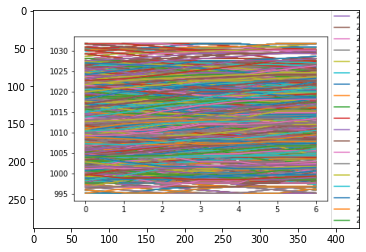

In [64]:

import matplotlib.image as mpimg

img = mpimg.imread("/content/barograph.png")
imgplot = plt.imshow(img)
#こんなグラフになりました　ここからクラスタリングして波を分類します https://irukanobox.blogspot.com/2019/05/python.html

In [ ]:
import pandas as pd
 
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
 
def tsclusteringN(ts_data, names):
    # クラスタリング
 
    # 正規化
    ts_dataset = TimeSeriesScalerMinMax().fit_transform(ts_data)
 
    metric = 'dtw'
    n_clusters = [n for n in range(2, 6)]
    for n in n_clusters:
        print('クラスター数 =', n)
 
        # metricが「DTW」か「softdtw」なら異なるデータ数の時系列データでもOK
        km = TimeSeriesKMeans(n_clusters=n, metric=metric, verbose=False, random_state=1).fit(ts_dataset)
 
        # クラスタリングの結果
        print('クラスタリング結果 =', km.labels_)
 
        # -1から1の範囲の値。シルエット値が1に近く、かつシルエット値をプロットしたシルエット図でクラスター間の幅の差が最も少ないクラスター数が最適
        # 今回はシルエット値のみを確認
        print('シルエット値 =', silhouette_score(ts_dataset, km.labels_, metric=metric))
        print()
 
def main():
    df = load_tsdata()
    tsclusteringN(df.values.transpose(), df.columns)
 
if __name__ == '__main__':
    main()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  import sys


クラスター数 = 2
クラスタリング結果 = [1 1 1 ... 1 1 1]


In [ ]:
import pandas as pd
 
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
 
import matplotlib.pyplot as plt
 
# ターミナル対応
import matplotlib
matplotlib.use('Agg')
 
def plot_clustering(km, ts_dataset, names, n_clusters):
    # クラスタリングの結果をプロット
 
    # クラスターごとの中心をプロット
    for i, c in enumerate(km.cluster_centers_):
        plt.plot(c.T[0], label=i)
 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.savefig('ts_clust_center.png')
    plt.clf()
 
    # クラスターごとのプロット
    for i in range(n_clusters):
        for label, d, t in zip(km.labels_, ts_dataset, names):
            if label == i:
                plt.plot(d, label=t)
 
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        plt.savefig('ts_labeled{}.png'.format(i))
        plt.clf()
 
def tsclustering(ts_data, names):
    # 正規化
    ts_dataset = TimeSeriesScalerMinMax().fit_transform(ts_data)
 
    n_clusters = 2
    metric = 'dtw'
 
    # metricが「DTW」か「softdtw」なら異なるデータ数の時系列データでもOK
    km = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric, verbose=False, random_state=1).fit(ts_dataset)
 
    # クラスタリングの結果
    print('クラスタリング結果 =', km.labels_)
 
    plot_clustering(km, ts_dataset, names, n_clusters)
 
def main():
    df = load_tsdata()
    #tsclusteringN(df.values.transpose(), df.columns)
    tsclustering(df.values.transpose(), df.columns)
 
if __name__ == '__main__':
    main()

In [ ]:
import pandas as pd
 
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
 
import matplotlib.pyplot as plt
 
# ターミナル対応
import matplotlib
matplotlib.use('Agg')
 
def plot_clustering(km, ts_dataset, names, n_clusters):
    # クラスタリングの結果をプロット
 
    # クラスターごとの中心をプロット
    for i, c in enumerate(km.cluster_centers_):
        plt.plot(c.T[0], label=i)
 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.savefig('ts_clust_center.png')
    plt.clf()
 
    # クラスターごとのプロット
    for i in range(n_clusters):
        for label, d, t in zip(km.labels_, ts_dataset, names):
            if label == i:
                plt.plot(d, label=t)
 
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        plt.savefig('ts_labeled{}.png'.format(i))
        plt.clf()
 
def tsclustering(ts_data, names):
    # 正規化
    ts_dataset = TimeSeriesScalerMinMax().fit_transform(ts_data)
 
    n_clusters = 3
    metric = 'dtw'
 
    # metricが「DTW」か「softdtw」なら異なるデータ数の時系列データでもOK
    km = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric, verbose=False, random_state=1).fit(ts_dataset)
 
    # クラスタリングの結果
    print('クラスタリング結果 =', km.labels_)
 
    plot_clustering(km, ts_dataset, names, n_clusters)
 
def main():
    df = load_tsdata()
    #tsclusteringN(df.values.transpose(), df.columns)
    tsclustering(df.values.transpose(), df.columns)
 
if __name__ == '__main__':
    main()

In [ ]:
import pandas as pd
 
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
 
import matplotlib.pyplot as plt
 
# ターミナル対応
import matplotlib
matplotlib.use('Agg')
 
def plot_clustering(km, ts_dataset, names, n_clusters):
    # クラスタリングの結果をプロット
 
    # クラスターごとの中心をプロット
    for i, c in enumerate(km.cluster_centers_):
        plt.plot(c.T[0], label=i)
 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.savefig('ts_clust_center.png')
    plt.clf()
 
    # クラスターごとのプロット
    for i in range(n_clusters):
        for label, d, t in zip(km.labels_, ts_dataset, names):
            if label == i:
                plt.plot(d, label=t)
 
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        plt.savefig('ts_labeled{}.png'.format(i))
        plt.clf()
 
def tsclustering(ts_data, names):
    # 正規化
    ts_dataset = TimeSeriesScalerMinMax().fit_transform(ts_data)
 
    n_clusters = 4
    metric = 'dtw'
 
    # metricが「DTW」か「softdtw」なら異なるデータ数の時系列データでもOK
    km = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric, verbose=False, random_state=1).fit(ts_dataset)
 
    # クラスタリングの結果
    print('クラスタリング結果 =', km.labels_)
 
    plot_clustering(km, ts_dataset, names, n_clusters)
 
def main():
    df = load_tsdata()
    #tsclusteringN(df.values.transpose(), df.columns)
    tsclustering(df.values.transpose(), df.columns)
 
if __name__ == '__main__':
    main()

In [ ]:
import pandas as pd
 
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
 
import matplotlib.pyplot as plt
 
# ターミナル対応
import matplotlib
matplotlib.use('Agg')
 
def plot_clustering(km, ts_dataset, names, n_clusters):
    # クラスタリングの結果をプロット
 
    # クラスターごとの中心をプロット
    for i, c in enumerate(km.cluster_centers_):
        plt.plot(c.T[0], label=i)
 
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    plt.savefig('ts_clust_center.png')
    plt.clf()
 
    # クラスターごとのプロット
    for i in range(n_clusters):
        for label, d, t in zip(km.labels_, ts_dataset, names):
            if label == i:
                plt.plot(d, label=t)
 
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        plt.savefig('ts_labeled{}.png'.format(i))
        plt.clf()
 
def tsclustering(ts_data, names):
    # 正規化
    ts_dataset = TimeSeriesScalerMinMax().fit_transform(ts_data)
 
    n_clusters = 5
    metric = 'dtw'
 
    # metricが「DTW」か「softdtw」なら異なるデータ数の時系列データでもOK
    km = TimeSeriesKMeans(n_clusters=n_clusters, metric=metric, verbose=False, random_state=1).fit(ts_dataset)
 
    # クラスタリングの結果
    print('クラスタリング結果 =', km.labels_)
 
    plot_clustering(km, ts_dataset, names, n_clusters)
 
def main():
    df = load_tsdata()
    #tsclusteringN(df.values.transpose(), df.columns)
    tsclustering(df.values.transpose(), df.columns)
 
if __name__ == '__main__':
    main()